In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
# Reading the data from white wine dataset
data = pd.read_csv('winequality-white.csv', delimiter=';')

In [3]:
# Reading the data from red wine dataset
data2 = pd.read_csv('winequality-red.csv', delimiter=';')

In [4]:
# Inserting 'type' column with white and red wine
data.insert(0, 'type', 'white')
data2.insert(0, 'type', 'red')

In [5]:
# Appending both data and data2 column-wise
df = data.append(data2, ignore_index = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<AxesSubplot:>

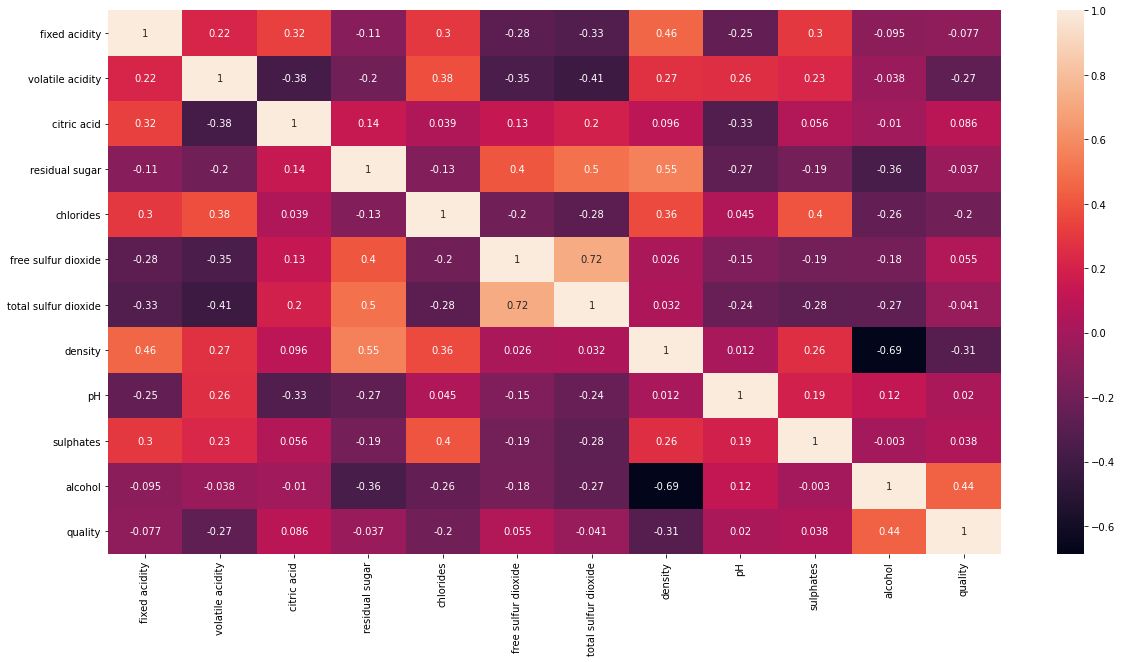

In [7]:
# Calculating the Correlation Matrix
corr_mat = df.corr()
plt.figure(figsize=[20,10])
sns.heatmap(corr_mat,annot=True)

In [8]:
# Identifying the column which is highly co-related to other columns

for i in range(len(corr_mat.columns)):
    for j in range(i):
        if abs(corr_mat.iloc[i,j]) > 0.7:
            col_name = corr_mat.columns[i]
            print(col_name)

total sulfur dioxide


In [9]:
# Dropping the 'total sulfur dioxide' column
df.drop('total sulfur dioxide',axis=1, inplace = True)

In [10]:
# For handling of categorical columns
df = pd.get_dummies(df,drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


In [11]:
# Considering the wine of best quality only if the quality of the wine is greater than 7
df['best quality'] = [ 1 if x>=7 else 0 for x in df.quality] 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white,best quality
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,6,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0,0


In [12]:
# Dropping the 'quality' column
df.drop(['quality'], axis=1, inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white,best quality
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,0,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,0.99512,3.52,0.76,11.2,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,0,0


In [13]:
df[df['best quality'] == 1].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white,best quality
13,6.6,0.16,0.40,1.5,0.044,48.0,0.9912,3.54,0.52,12.4,1,1
15,6.6,0.17,0.38,1.5,0.032,28.0,0.9914,3.25,0.55,11.4,1,1
17,6.2,0.66,0.48,1.2,0.029,29.0,0.9892,3.33,0.39,12.8,1,1
20,6.2,0.66,0.48,1.2,0.029,29.0,0.9892,3.33,0.39,12.8,1,1
21,6.4,0.31,0.38,2.9,0.038,19.0,0.9912,3.17,0.35,11.0,1,1


In [14]:
# Segregating the target variable i.e. 'best quality'
y = df['best quality']

In [15]:
type(y)

pandas.core.series.Series

In [16]:
# Considering the dependent variables from the dataset
x = df.drop(['best quality'], axis=1)

In [17]:
# Splitting the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
# Randomized Search CV Parameters

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [19]:
# Creating the grid
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [20]:
# Instantiating Random Forest Classifier
ran_forest = RandomForestClassifier()

In [21]:
rf = RandomizedSearchCV(estimator = ran_forest, param_distributions = grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, n_jobs = 1)

In [22]:
rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.4s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   3.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=100, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [23]:
# Predicting the test dataset
predictions = rf.predict(x_test)

# Calculating the score of the model on test set
model_score = rf.score(x_test,y_test)

In [24]:
# Calculating Mean Squared Error
MSE = mean_squared_error(y_test,predictions)

# Calculating Root Mean Squared Error
RMSE = np.sqrt(MSE)

print('Mean Squared Error is : ', MSE)
print('Root Mean Squared Error is : ', RMSE)
print('Score of the model is : ', model_score)
print(classification_report(y_test, predictions))

Mean Squared Error is :  0.12846153846153846
Root Mean Squared Error is :  0.3584153156068229
Score of the model is :  -0.12846153846153846
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1036
           1       0.75      0.55      0.63       264

    accuracy                           0.87      1300
   macro avg       0.82      0.75      0.78      1300
weighted avg       0.86      0.87      0.86      1300



In [25]:
# Saving the model into pickle file
import pickle
file = 'WineQualityModel.pkl'
#save file
save = pickle.dump(rf,open(file,'wb'))